In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv('creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
data.shape

(284807, 31)

In [5]:
print("no of rows", data.shape[0])
print("no of columns", data.shape[1])

no of rows 284807
no of columns 31


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.drop('Time', axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
#cheking duplicates value
data.duplicated().sum()

1081

In [10]:
#removing duplicates value
data= data.drop_duplicates()

In [11]:
data.shape

(283726, 31)

In [12]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [13]:
x=data.drop('Class', axis=1)
y=data['Class']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

# Handling Imbalanced Dataset

In [15]:
# Undersampling
# Oversampling

# Undersampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

In [16]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [17]:
normal.shape

(283253, 31)

In [18]:
fraud.shape

(473, 31)

In [19]:
normal_sample = normal.sample(n=473)

In [20]:
normal_sample.shape

(473, 31)

In [21]:
new_data= pd.concat([normal_sample, fraud])

In [22]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [23]:
x=new_data.drop('Class', axis=1)
y=new_data['Class']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

# Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
log_pred= log_model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, log_pred)

array([[82,  6],
       [ 8, 94]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, log_pred)

0.9263157894736842

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [31]:
precision_score(y_test, log_pred)

0.94

In [32]:
recall_score(y_test, log_pred)

0.9215686274509803

In [33]:
f1_score(y_test, log_pred)

0.9306930693069307

# Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred1 = dt.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[78, 10],
       [ 8, 94]], dtype=int64)

In [37]:
accuracy_score(y_test, y_pred1)

0.9052631578947369

In [38]:
precision_score(y_test, y_pred1)

0.9038461538461539

In [39]:
recall_score(y_test, y_pred1)

0.9215686274509803

In [40]:
f1_score(y_test, y_pred1)

0.912621359223301

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
y_pred2 = rf.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[84,  4],
       [11, 91]], dtype=int64)

In [44]:
accuracy_score(y_test, y_pred2)

0.9210526315789473

In [45]:
precision_score(y_test, y_pred2)

0.9578947368421052

In [46]:
recall_score(y_test, y_pred2)

0.8921568627450981

In [47]:
f1_score(y_test, y_pred2)

0.9238578680203046

In [48]:
final_data=pd.DataFrame({'Models':['Logistic_regression', 'Decision_tree','Random_forest'],
             'Accuracy':[accuracy_score(y_test, log_pred)*100,
                        accuracy_score(y_test, y_pred1)*100,
                        accuracy_score(y_test, y_pred2)*100],
             'Precision':[precision_score(y_test, log_pred)*100,
                         accuracy_score(y_test, y_pred1)*100,
                         precision_score(y_test, y_pred2)*100],
             'Recall':[recall_score(y_test, log_pred)*100,
                      recall_score(y_test, y_pred1)*100,
                      recall_score(y_test, y_pred2)*100],
             'F1-Score':[f1_score(y_test, log_pred)*100,
                        f1_score(y_test, y_pred1)*100,
                        f1_score(y_test, y_pred2)*100]}, index=(1,2,3))

In [49]:
final_data

,Models,Accuracy,Precision,Recall,F1-Score
1,Logistic_regression,92.631579,94.000000,92.156863,93.069307
2,Decision_tree,90.526316,90.526316,92.156863,91.262136
3,Random_forest,92.105263,95.789474,89.215686,92.385787


<Axes: xlabel='Models', ylabel='Accuracy'>

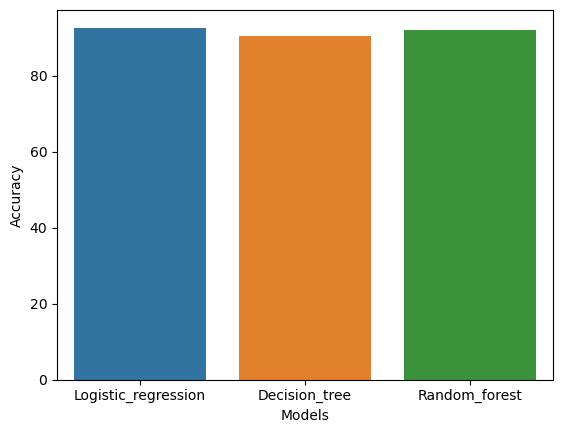

In [50]:
import seaborn as sns
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])

In undersampling random forest gives good accuracy(94.2105) and precision(98.92)

# Oversampling

SMOTE Technique is used- This technique generates synthetic data for the minority class.
SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [51]:
x=data.drop('Class', axis=1)
y=data['Class']

In [52]:
x.shape

(283726, 30)

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
x_res, y_res = SMOTE().fit_resample(x,y)

In [55]:
y_res.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

# train- test split

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, random_state=42, test_size=0.2)

# Logistic Regression

In [57]:
log= LogisticRegression()
log.fit(x_train, y_train)

C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
log_pred= log_model.predict(x_test)

In [59]:
confusion_matrix(y_test, log_pred)

array([[54248,  2215],
       [ 1765, 55074]], dtype=int64)

In [60]:
accuracy_score(y_test, log_pred)

0.9648726412596423

In [61]:
precision_score(y_test, log_pred)

0.961336382202517

In [62]:
recall_score(y_test, log_pred)

0.9689473776808177

In [63]:
f1_score(y_test, log_pred)

0.965126875087621

# Random Forest

In [64]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [65]:
rf_pred= rf.predict(x_test)

In [66]:
confusion_matrix(y_test, rf_pred)

array([[56450,    13],
       [    2, 56837]], dtype=int64)

In [67]:
accuracy_score(y_test, rf_pred)

0.9998676104570087

In [68]:
precision_score(y_test, rf_pred)

0.9997713280562884

In [69]:
recall_score(y_test, rf_pred)

0.9999648128925561

In [70]:
f1_score(y_test, rf_pred)

0.999868061114092

# Decision Tree

In [71]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
dt_pred=dt.predict(x_test)

In [73]:
confusion_matrix(y_test, dt_pred)

array([[56339,   124],
       [   38, 56801]], dtype=int64)

In [74]:
accuracy_score(y_test, dt_pred)

0.9985701929356939

In [75]:
precision_score(y_test, dt_pred)

0.9978216952129996

In [76]:
recall_score(y_test, dt_pred)

0.9993314449585672

In [77]:
f1_score(y_test, dt_pred)

0.9985759994374319

In [78]:
final_data2=pd.DataFrame({'Models':['Logistic_regression', 'Decision_tree','Random_forest'],
             'Accuracy':[accuracy_score(y_test, log_pred)*100,
                        accuracy_score(y_test, dt_pred)*100,
                        accuracy_score(y_test, rf_pred)*100],
             'Precision':[precision_score(y_test, log_pred)*100,
                         accuracy_score(y_test, dt_pred)*100,
                         precision_score(y_test, rf_pred)*100],
             'Recall':[recall_score(y_test, log_pred)*100,
                      recall_score(y_test, dt_pred)*100,
                      recall_score(y_test, rf_pred)*100],
             'F1-Score':[f1_score(y_test, log_pred)*100,
                        f1_score(y_test, dt_pred)*100,
                        f1_score(y_test, rf_pred)*100]}, index=(1,2,3))

In [79]:
final_data2

,Models,Accuracy,Precision,Recall,F1-Score
1,Logistic_regression,96.487264,96.133638,96.894738,96.512688
2,Decision_tree,99.857019,99.857019,99.933144,99.857600
3,Random_forest,99.986761,99.977133,99.996481,99.986806


<Axes: xlabel='Models', ylabel='Accuracy'>

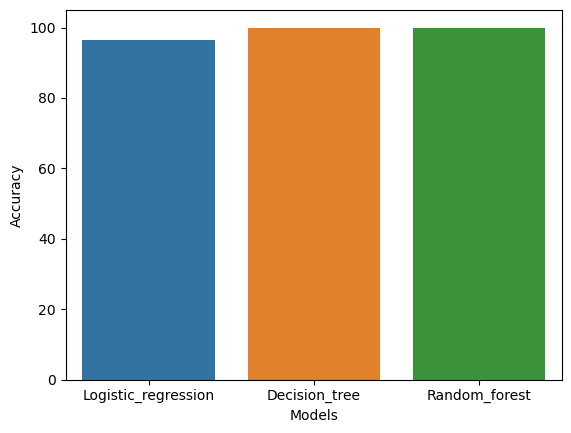

In [80]:
import seaborn as sns
sns.barplot(x=final_data2['Models'],y=final_data2['Accuracy'])

Oversampling gives better performance than Undersampling.
In oversampling Randomforest gives good performance than other classifier and having accuracy, precision is 99.98 & 99.97 respectively